# Predicting Bank Customer Churn Using Machine Learning

### Problem Definition


### Data
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?select=BankChurners.csv 


### Evaluation 


### Features 

#### Bank Customer Churn Dictionary

1. CLIENTNUM - Unique identifier for the customer holding the account.
2. Attrition_Flag - Target variable  (1=Churned; 0=Not Churned) 
3. Customer_Age -  Customer's age in years.
4. Gender - (0=Male; 1=Female)
5. Dependent_Count - Number of dependents (number of people that the account holder financially supports)
6. Education_Level - Educational qualification of the account holder
    * 0=Uneducated 
    * 1=High School      
    * 2=College          
    * 3=Graduate       
    * 4=Post-Graduate          
    * 5=Doctorate     
    * 6=Unknown 
7. Marital_Status
    * 0=Single
    * 1=Married
    * 2=Divorced 
    * 3=Unknown
8. Income_Category - Annual Income Category of the account holder
    * 0=Less than 40K   
    * 1=40K - 60K      
    * 2=80K - 120K      
    * 3=60K - 80K       
    * 4=120K +
    * 5=Unknown
9. Card_Category - Type of Card 
    * 0=Blue
    * 1=Silver
    * 2=Gold
    * 3=Platinum
10. Months_on_book - Period of relationship with the bank in months
11. Total_Relationship_Count - Total number of products held by the customer
12. Months_Inactive_12_mon - Number of months inactive in the last 12 months 
13. Contacts_Count_12_mon - Number of contacts with the bank in the last 12 months
14. Credit_Limit - Credit Limit on the credit card
15. Total_Revolving_Bal - Total revolving balance on the credit card
    * Revolving balance = The amount of credit card spending that goes unpaid at the end of a billing cycle
16. Avg_Open_To_Buy - Open to buy credit line (average in the last 12 months)
    * The difference between the credit limit assigned to a cardholder account and the present balance on the account
17. Total_Amt_Chng_Q4_Q1 - Change in transaction amount (Q4 over Q1)
18. Total_Trans_Amt - Total transaction amount (last 12 months)
19. Total_Trans_Ct - Total transaction count (last 12 months)
20. Total_Ct_Chng_Q4_Q1 - Change in transaction count (Q4 over Q1)
21. Avg_Utilization_Ratio - Average card utilization ratio





## 1. Exploratory Data Analysis 

## Librairies  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
# Import data into DataFrame 
data = pd.read_csv("BankChurners.csv")
data.shape

(10127, 23)

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [31]:
# The dataset contains 3 irrelevant columns (first column and last 2 columns)
#
df = data.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
                "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                "CLIENTNUM"], axis=1)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [20]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [21]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [22]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


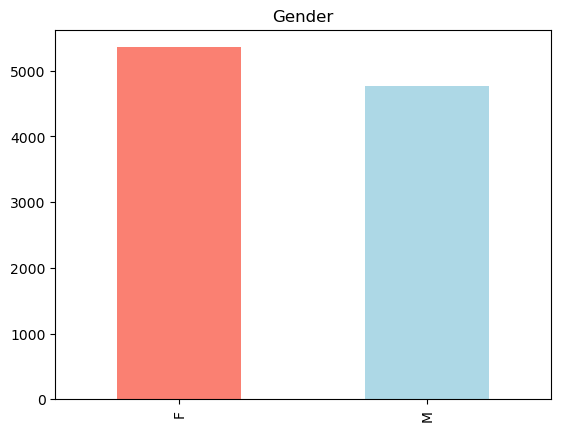

In [9]:
df.Gender.value_counts().plot(kind="bar", title="Gender", color=["salmon", "lightblue"]);

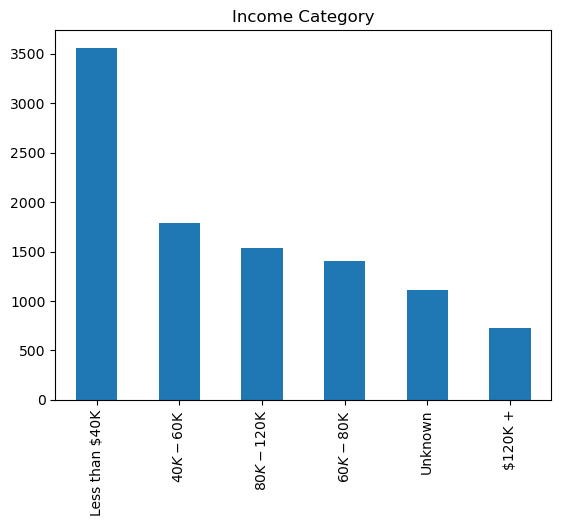

In [10]:
df.Income_Category.value_counts().plot(kind="bar", title="Income Category");

In [33]:
# Transform the target column and gender column 
df.Attrition_Flag = df.Attrition_Flag.replace({"Attrited Customer": 1, "Existing Customer" : 0})
df.Gender = df.Gender.replace({"F": 1, "M":0})

# Transform the other categorical columns by making dictionaries
dict_edu = {"Uneducated": 0, "High School": 1, "College": 2, "Graduate": 3, "Post-Graduate": 4, "Doctorate": 5, "Unknown": 6}
dict_marital = {"Single": 0, "Married": 1, "Divorced": 2, "Unknown": 3}
dict_income = {"Less than $40K": 0, "$40K - $60K": 1, "$60K - $80K": 2, "$80K - $120K": 3, "$120K +": 4, "Unknown": 5}
dict_card = {"Blue": 0, "Silver": 1 , "Gold": 2, "Platinum": 3}

# remap the values 
df = df.replace({"Education_Level": dict_edu, "Marital_Status": dict_marital, "Income_Category": dict_income, "Card_Category": dict_card})

df.head()



,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,3,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,3,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,1,3,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,0,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [115]:
df["Attrition_Flag"].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

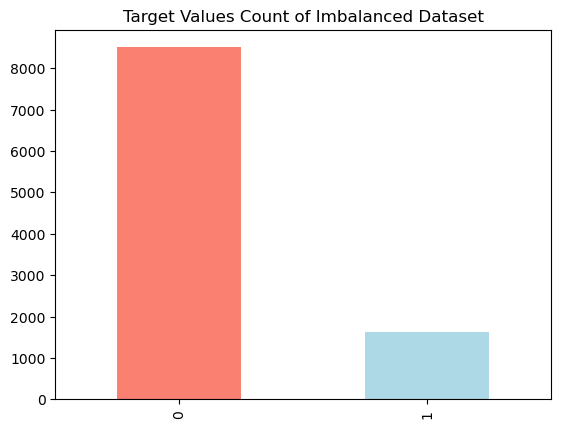

In [116]:
import seaborn as sns

df.Attrition_Flag.value_counts().plot(kind="bar", title="Target Values Count of Imbalanced Dataset", color=["salmon", "lightblue"]);

# Imbalanced dataset 

(10127, 20)


In [14]:
# Let's try to remove the unknown values
df_modif = df[df.Education_Level != 6]
df_modif = df_modif[df_modif.Income_Category != 5]
df_modif = df_modif[df_modif.Marital_Status != 3]
df_modif.shape

(7081, 20)

In [164]:
# Let's try to remove some columns 
#df_modif_drop_features= df.drop(["Dependent_count", "Marital_Status", "Months_on_book", "Customer_Age"],
#                                  axis=1)
#df_modif_drop_features = df_modif_drop_features[df_modif_drop_features.Education_Level != 6]

#df_modif_drop_features = df_modif_drop_features[df_modif_drop_features.Income_Category != 5]
#df_modif_drop_features.shape

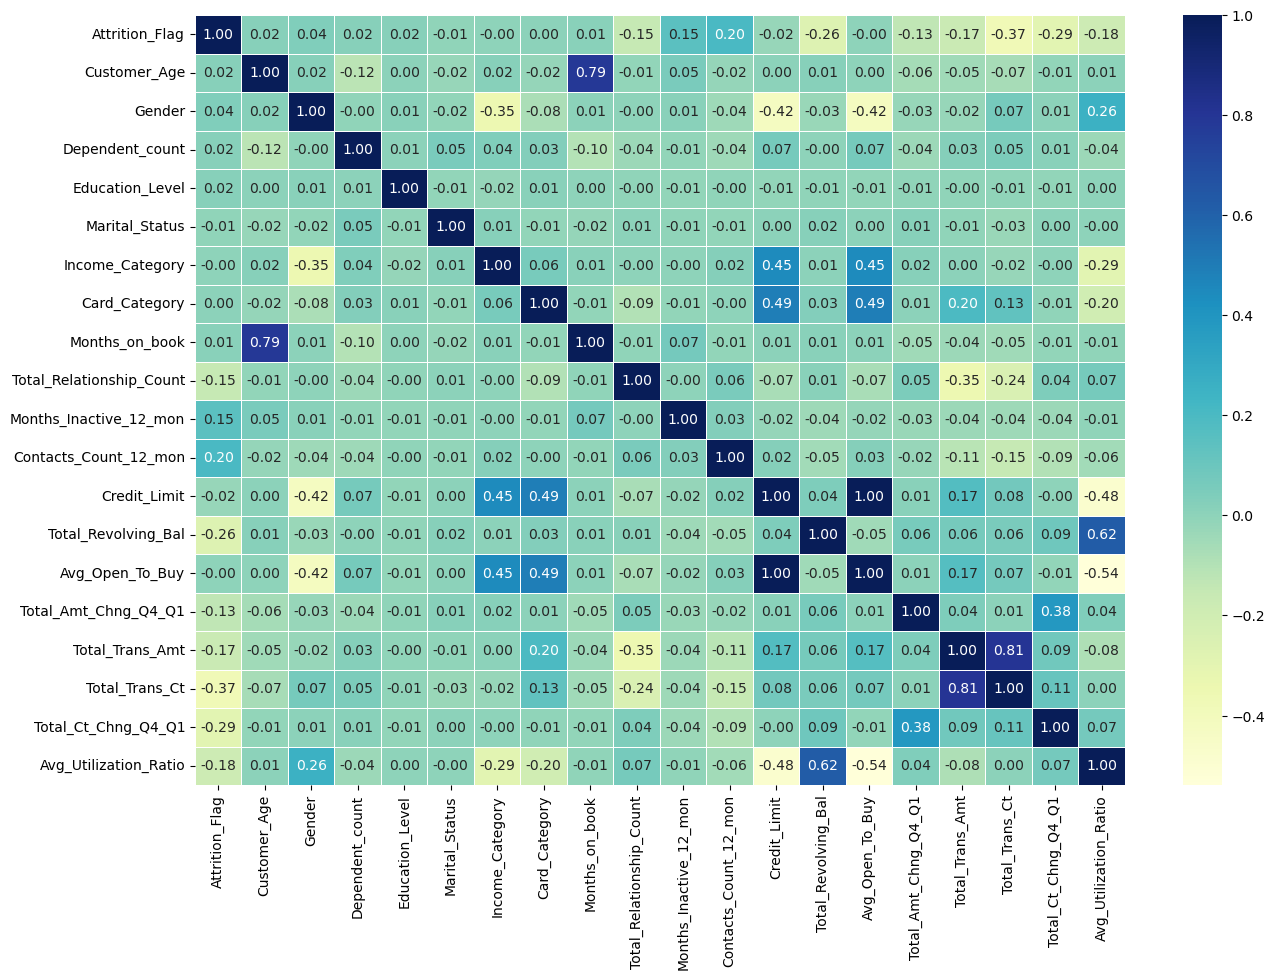

In [13]:
from sklearn.preprocessing import StandardScaler
## Correlation Matrix
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

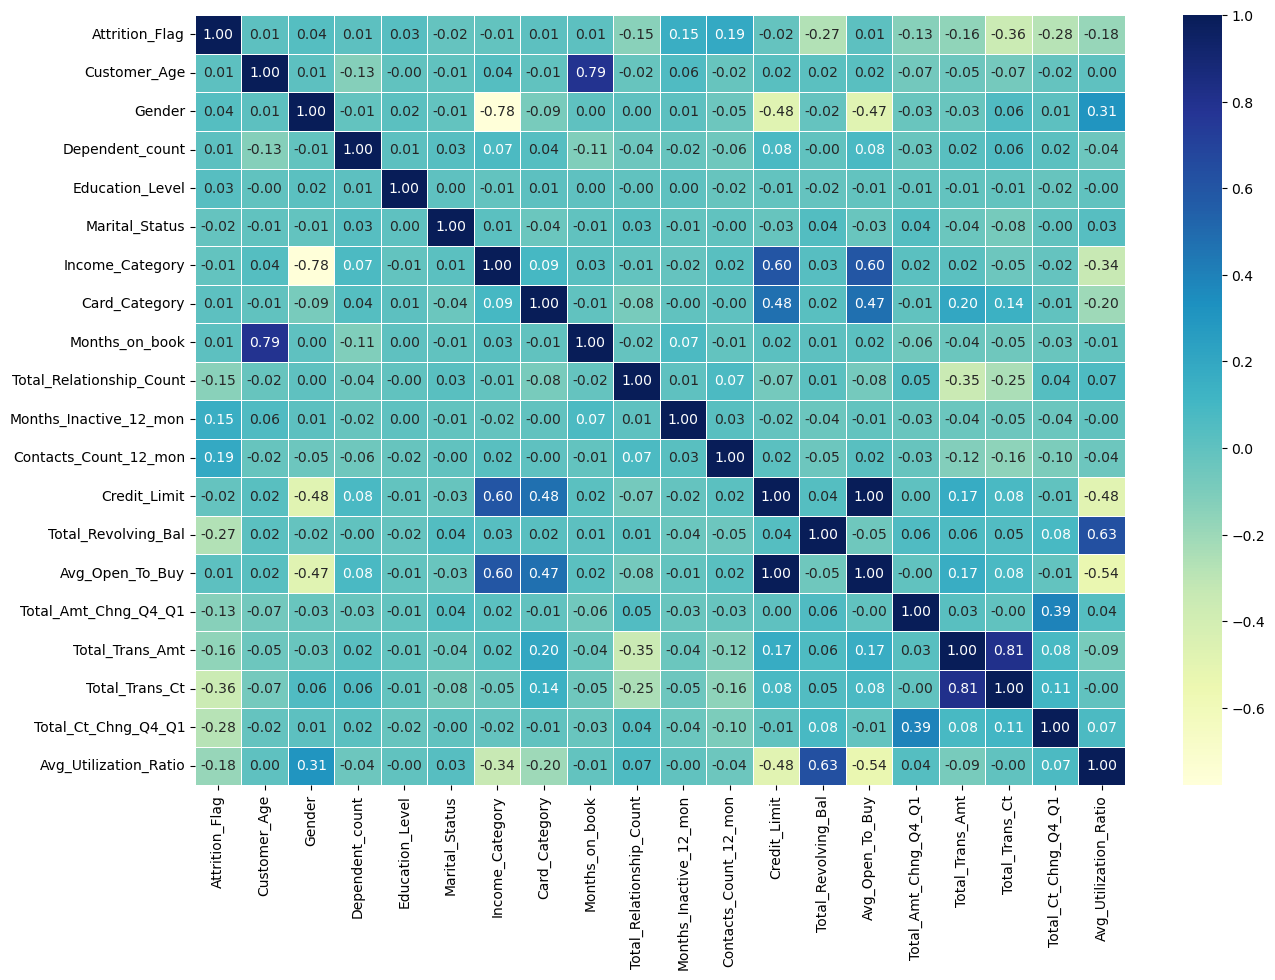

In [15]:
# Correlation matrix with no unknown values
correlation_matrix_modif = df_modif.corr()
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(correlation_matrix_modif,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

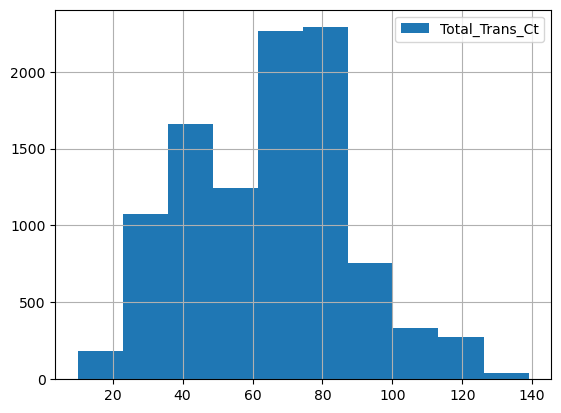

In [104]:
hist_total_trans_ct = df["Total_Trans_Ct"].hist(grid=True, bins=10, legend=True);

In [24]:
#Split the data into train and test 
from sklearn.model_selection import train_test_split

#Split into X (independent variables) and y (target)
X = df.drop("Attrition_Flag", axis=1)
y = df["Attrition_Flag"]

# Split data into train and test sets 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y)


# Look at the shape of our train and test sets 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 19), (2026, 19), (8101,), (2026,))

 ### Feature Scaling 
 

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[-1.30123226,  0.94673201, -1.80990009, ..., -0.96164395,
        -1.09357251,  2.14886698],
       [-0.29934015, -1.05626512,  0.50150306, ..., -1.13108253,
        -0.53724387, -1.00007234],
       [-0.04886713, -1.05626512, -0.26896466, ...,  1.02925938,
         0.57953438, -0.71710314],
       ...,
       [ 1.82968056,  0.94673201, -1.80990009, ..., -0.79220537,
         1.1811935 , -1.00007234],
       [-0.42457667,  0.94673201,  0.50150306, ...,  0.05498754,
        -0.08806   ,  2.35202436],
       [ 0.70255195,  0.94673201,  0.50150306, ...,  0.81746115,
         0.00260097,  1.52125581]])

## Modeling

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model Dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gradient Boost": GradientBoostingClassifier()}

# Function to fit and score our models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [27]:
model_score = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)



model_score

{'Logistic Regression': 0.9017769002961501,
 'KNN': 0.9022704837117473,
 'Random Forest': 0.956071076011846,
 'Gradient Boost': 0.9615004935834156}

In [184]:
!pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/235.6 kB 445.2 kB/s eta 0:00:01
   ----- --------------------------------- 30.7/235.6 kB 445.2 kB/s eta 0:00:01
   ----- --------------------------------- 30.7/235.6 kB 445.2 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/235.6 kB 219.4 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/235.6 kB 299.4 kB/s eta 0:00:01
   ----------- --------------------------- 71.7/235.6 kB 281.8 kB/s eta 0:00:01
   --------------

## Let's try to balance our dataset 

In [72]:

#Split into X (independent variables) and y (target)
X = df.drop("Attrition_Flag", axis=1)
y = df["Attrition_Flag"]

from imblearn.over_sampling import SMOTE

X_res, y_res = SMOTE().fit_resample(X, y)
y_res.value_counts()

0    8500
1    8500
Name: Attrition_Flag, dtype: int64

In [37]:
# Drop unknown 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_modif = df_modif.drop("Attrition_Flag", axis=1)
y_modif = df_modif["Attrition_Flag"]

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_modif,
                                                    y_modif,
                                                    test_size=0.2)

X_res_modif, y_res_modif = SMOTE().fit_resample(X_train, y_train)
y_res_modif.value_counts()

0    4763
1    4763
Name: Attrition_Flag, dtype: int64

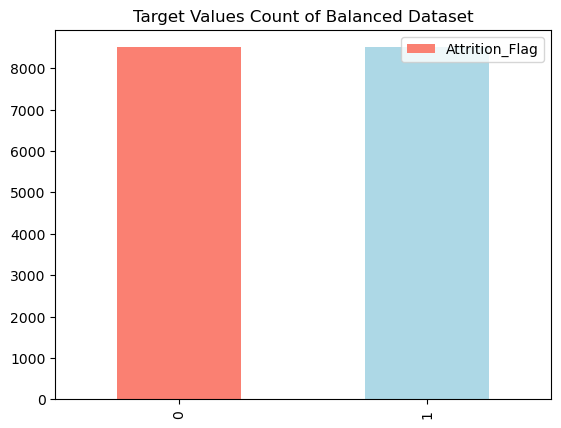

In [62]:
# Balanced dataset 
y_res.value_counts().plot(kind="bar", title="Target Values Count of Balanced Dataset", color=["salmon", "lightblue"]);
                                                                                                                        


In [73]:
#Split the data into train and test 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score



# Split data into train and test sets 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_res,
                                                    y_res,
                                                    test_size=0.2)


# Look at the shape of our train and test sets 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13600, 19), (3400, 19), (13600,), (3400,))

In [125]:
## Drop 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_res_modif,
                                                    y_res_modif,
                                                    test_size=0.2)


# Look at the shape of our train and test sets 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9548, 19), (2388, 19), (9548,), (2388,))

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model Dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gradient Boost": GradientBoostingClassifier()}

# Function to fit and score our models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [40]:
model_score = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)



model_score

{'Logistic Regression': 0.9061397318278053,
 'KNN': 0.913196894848271,
 'Random Forest': 0.9611856033874383,
 'Gradient Boost': 0.9597741707833451}

In [212]:
# Random Forest and Gradient Boost seems to be the best options. 
# Now l'ets tune their parameters and see if it would be better 

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": [25, 50],
           "max_depth": [3, 6, 9],
           "max_features": ["sqrt", "log2", None],
           "max_leaf_nodes": [3, 6, 9]}

gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50]},
             verbose=True)

In [213]:
gs_rf.best_params_

{'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 50}

In [217]:
gs_rf.score(X_test, y_test)

0.9173529411764706

We dont get a better scor, its worst

In [132]:
## Make predictions

clf = RandomForestClassifier()
np.random.seed(42)

clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

y_preds

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [30]:
y_test

10941    1
5250     0
10292    1
2266     0
6398     0
        ..
4706     0
8404     0
11114    1
7877     0
6188     0
Name: Attrition_Flag, Length: 3400, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

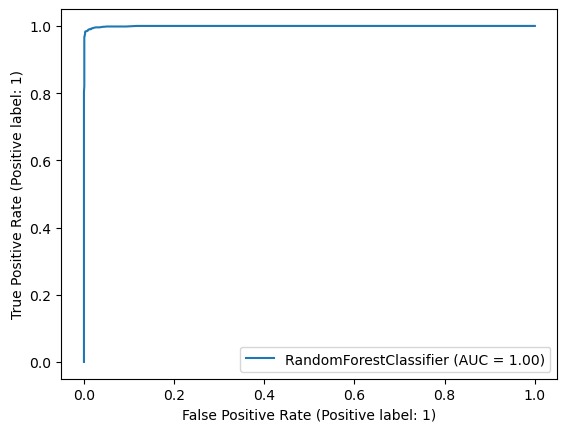

In [130]:
RocCurveDisplay.from_estimator(clf, X_test, y_test);

In [33]:
print(confusion_matrix(y_test, y_preds))

[[1634   42]
 [  21 1703]]


In [133]:
print(confusion_matrix(y_test, y_preds))

[[1179   35]
 [  22 1152]]


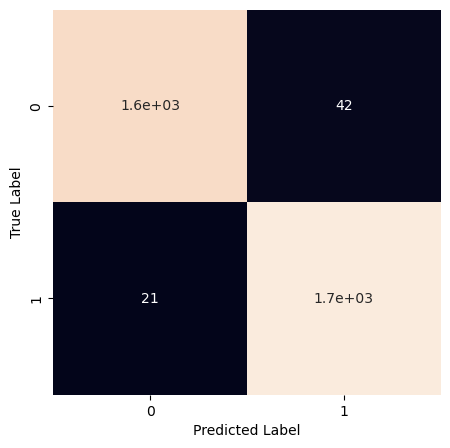

In [34]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label");

In [35]:
# classification report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1676
           1       0.98      0.99      0.98      1724

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400



In [240]:
# Cross-validated accuracy score

cv_acc = cross_val_score(clf,
          X_res,
          y_res,
          cv=10,
          scoring="accuracy")
cv_acc

array([0.90705882, 0.92411765, 0.96411765, 0.97058824, 0.98647059,
       0.99705882, 0.99764706, 0.99588235, 0.96235294, 0.96588235])

In [241]:
cv_acc = np.mean(cv_acc)

In [242]:
cv_acc

0.9671176470588236

In [38]:


def cross_validated_scores(clf, X, y, scoring):
    np.random.seed(42)
    cv_metrics=[]
    for scores in scoring:
        cross_scores = np.mean(cross_val_score(clf, X, y, cv=10, scoring=scores))
        cv_metrics.append(cross_scores)
    cv_metrics_visual = pd.DataFrame({"Accuracy": cv_metrics[0],
                                      "Precision": cv_metrics[1],
                                      "Recall": cv_metrics[2],
                                      "F1": cv_metrics[3]}, index=[0])
    ax = cv_metrics_visual.T.plot.bar(title="Cross-Validated Metrics", legend=False)
    for container in ax.containers:  #stackoverflow (favoris)
        ax.bar_label(container)
        

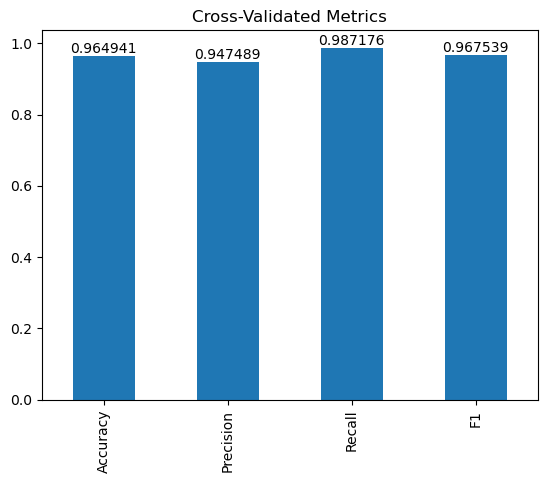

In [39]:
scoring = ["accuracy", "precision", "recall", "f1"]   

cross_validated_scores(clf, X_res, y_res, scoring)

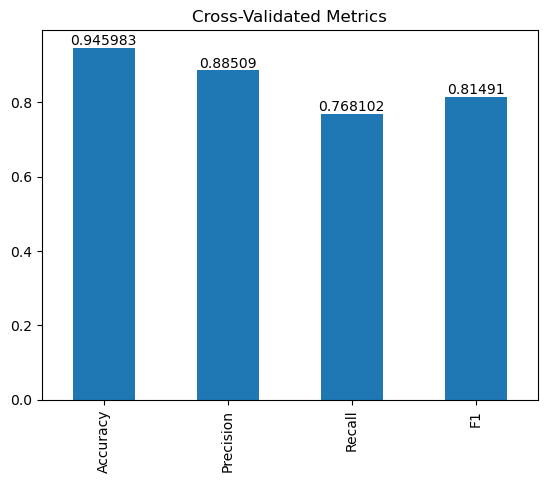

In [41]:
# Imbalanced dataset 
cross_validated_scores(clf, X, y, scoring)

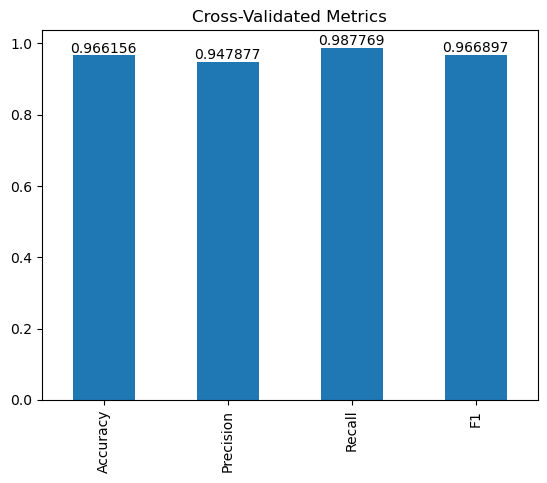

In [129]:
# no unknown values
scoring = ["accuracy", "precision", "recall", "f1"]   

cross_validated_scores(clf, X_res_modif, y_res_modif, scoring)

In [97]:
# feature importance


feature_dict = dict(zip(df.columns[1:], list(clf.feature_importances_)))
feature_dict



{'Customer_Age': 0.028038248721857423,
 'Gender': 0.0071391289510592615,
 'Dependent_count': 0.009359864473812683,
 'Education_Level': 0.009184422761432668,
 'Marital_Status': 0.01250348832085796,
 'Income_Category': 0.008811660976801448,
 'Card_Category': 0.001445013724042569,
 'Months_on_book': 0.017160035650080875,
 'Total_Relationship_Count': 0.06571332145158387,
 'Months_Inactive_12_mon': 0.015571672103649419,
 'Contacts_Count_12_mon': 0.014422820033381549,
 'Credit_Limit': 0.02618149832503158,
 'Total_Revolving_Bal': 0.10481823819688518,
 'Avg_Open_To_Buy': 0.027814135688235667,
 'Total_Amt_Chng_Q4_Q1': 0.05650711654054548,
 'Total_Trans_Amt': 0.22820849114354128,
 'Total_Trans_Ct': 0.22540392526459477,
 'Total_Ct_Chng_Q4_Q1': 0.08612840502225447,
 'Avg_Utilization_Ratio': 0.05558851265035182}

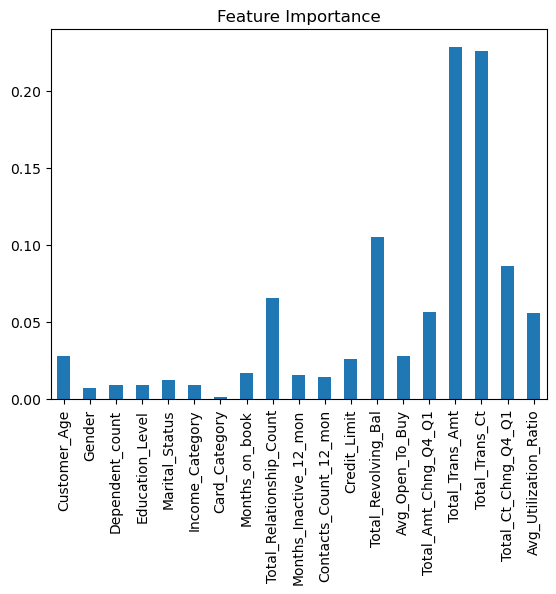

In [98]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [102]:
pd.crosstab(df["Gender"], df["Attrition_Flag"])

Attrition_Flag,0,1
Gender,,
0,4072,697
1,4428,930
